In [ ]:
import pandas as pd
import numpy as np
import os
from io import StringIO
import re
import csv

from tabulate import tabulate


import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns

from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import plot_partial_dependence

In [18]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 9]

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 400)

os.getcwd()

'/Users/lubagloukhov/Documents/Consulting/PiqueSolutions/JavaSE_202007/scripts'

In [19]:
mod_df = pd.read_csv('../data/output/mod_df.csv')  
catg_dummy_list = open('../data/output/catg_dummy_list.csv').read().splitlines()
cont_dummy_list = open('../data/output/cont_dummy_list.csv').read().splitlines()
dummy0_dummy_list = open('../data/output/dummy0_dummy_list.csv').read().splitlines()
exlc_dummy_list = open('../data/output/exlc_dummy_list.csv').read().splitlines()
map_df = pd.read_csv('../data/output/map_df.csv')

In [20]:

y0_list = ['Sat_Org_EclipseIDE',
 'Sat_Org_IntelliJIDE',
 'Sat_Org_JDeveloper',
 'Sat_Org_NetBeansIDE',
 'Sat_Org_RationalAppDev',
 'Sat_Org_VisualStudio',
 'Sat_Org_Other']
y1_list = ['Sat_Org_JavaSEAMC', tools
 'Sat_Org_JavaSEAMC_UsageLog',
 'Sat_Org_JavaSEDepRuleSet',
 'Sat_Org_JavaSEMSICustTools',
 'Sat_Org_JavaSEFlightRec']
y2_list = ['OJavaSESubscription_Elem_Sat_Org_ContinuedInvest',
 'OJavaSESubscription_Elem_Sat_Org_PatchesOlderV',
 'OJavaSESubscription_Elem_Sat_Org_JavaWebStartUpdates',
 'OJavaSESubscription_Elem_Sat_Org_DesktopManageUpdates',
 'OJavaSESubscription_Elem_Sat_Org_AutoUpdateTools',
 'OJavaSESubscription_Elem_Sat_Org_Monitoring',
 'OJavaSESubscription_Elem_Sat_Org_MyOSupport',
 'OJavaSESubscription_Elem_Sat_Org_AccessCloud',
 'OJavaSESubscription_Elem_Sat_Org_FlexLicensing',
 'OJavaSESubscription_Elem_Sat_Org_LegacyJava',
 'OJavaSESubscription_Elem_Sat_Org_Other']
y3_list = ['OJavaSESubscription_Attr_Sat_CommMethods',
 'OJavaSESubscription_Attr_Sat_PhoneSupport',
 'OJavaSESubscription_Attr_Sat_SSKnowledge',
 'OJavaSESubscription_Attr_Sat_CoNeedsUnd',
 'OJavaSESubscription_Attr_Sat_TrainingQual',
 'OJavaSESubscription_Attr_Sat_RepsonseTime']

In [21]:
x0_list = ['Use_Org_EclipseIDE',
 'Use_Org_IntelliJIDE',
 'Use_Org_JDeveloper',
 'Use_Org_NetBeansIDE',
 'Use_Org_RationalAppDev',
 'Use_Org_VisualStudio',
 'Use_Org_Other']

x1_list = ['Use_Org_JavaSEAMC',
 'Use_Org_JavaSEAMC_UsageLog',
 'Use_Org_JavaSEDepRuleSet',
 'Use_Org_JavaSEMSICustTools',
 'Use_Org_JavaSEFlightRec']
x2_list = ['OJavaSESubscription_Elem_Imp_Org_ContinuedInvest',
 'OJavaSESubscription_Elem_Imp_Org_PatchesOlderV',
 'OJavaSESubscription_Elem_Imp_Org_JavaWebStartUpdates',
 'OJavaSESubscription_Elem_Imp_Org_DesktopManageUpdates',
 'OJavaSESubscription_Elem_Imp_Org_AutoUpdateTools',
 'OJavaSESubscription_Elem_Imp_Org_Monitoring',
 'OJavaSESubscription_Elem_Imp_Org_MyOSupport',
 'OJavaSESubscription_Elem_Imp_Org_AccessCloud',
 'OJavaSESubscription_Elem_Imp_Org_FlexLicensing',
 'OJavaSESubscription_Elem_Imp_Org_LegacyJava',
 'OJavaSESubscription_Elem_Imp_Org_Other']
x3_list = ['OJavaSESubscription_Attr_Imp_CommMethods',
 'OJavaSESubscription_Attr_Imp_PhoneSupport',
 'OJavaSESubscription_Attr_Imp_SSKnowledge',
 'OJavaSESubscription_Attr_Imp_CoNeedsUnd',
 'OJavaSESubscription_Attr_Imp_TrainingQual',
 'OJavaSESubscription_Attr_Imp_RepsonseTime']

In [22]:
%run -i 'functions.py'

# Weighted

In [23]:
modw_df = mod_df.copy()

In [24]:
temp = mod_df[y0_list] * mod_df[x0_list].values
temp.columns = [x+"_w" for x in temp.columns]
modw_df = modw_df.join(temp)

temp = mod_df[y1_list] * mod_df[x1_list].values
temp.columns = [x+"_w" for x in temp.columns]
modw_df = modw_df.join(temp)

temp = mod_df[y2_list] * mod_df[x2_list].values
temp.columns = [x+"_w" for x in temp.columns]
modw_df = modw_df.join(temp)

temp = mod_df[y3_list] * mod_df[x3_list].values
temp.columns = [x+"_w" for x in temp.columns]
modw_df = modw_df.join(temp)

print(len(y3_list)+len(y2_list)+len(y1_list)+len(y0_list))
print(modw_df.shape)

29
(228, 264)


In [25]:
y0w_list = [x+"_w" for x in y0_list]
y1w_list = [x+"_w" for x in y1_list]
y2w_list = [x+"_w" for x in y2_list]
y3w_list = [x+"_w" for x in y3_list]

# Describe Sentiment Metric

In [27]:
y123w_var = modw_df[y1w_list + y2w_list + y3w_list].mean(axis=1,skipna=True)
modw_df['y123w_var'] = y123w_var

In [28]:
df1 = y123w_var.describe(include='all')

df1.loc['dtype'] = y123w_var.dtypes
df1.loc['size'] = len(y123w_var)
df1.loc['% count'] = y123w_var.isnull().mean()

print (df1)

count            221
mean         49.5136
std          20.2901
min                0
25%          36.0909
50%          47.9048
75%          63.8571
max             99.5
dtype        float64
size             228
% count    0.0307018
dtype: object


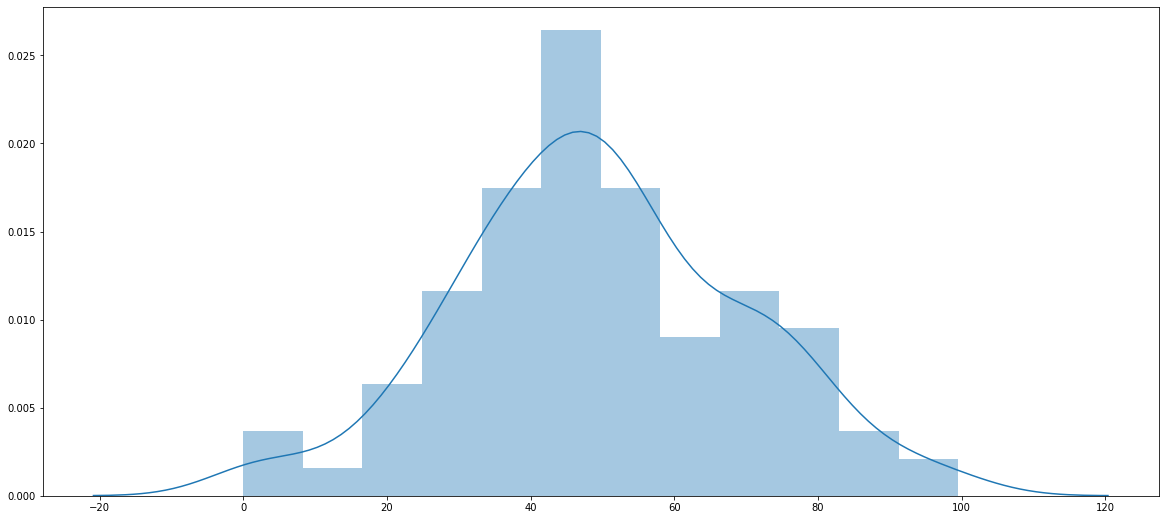

In [29]:
sns.distplot(y123w_var.fillna(y123w_var.mean()))

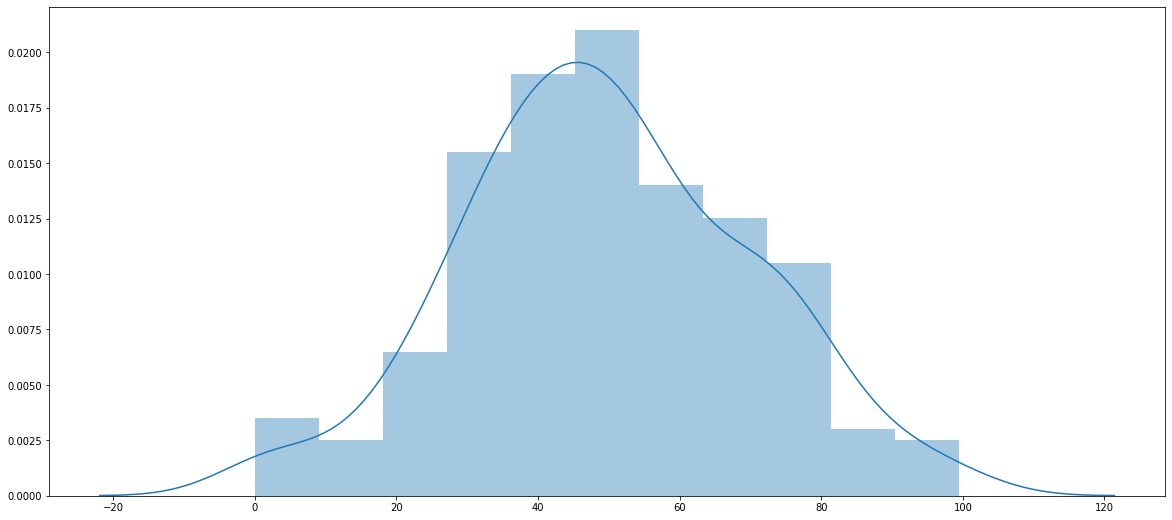

In [30]:
sns.distplot(y123w_var.dropna())

In [31]:
y2w_var = modw_df[y2w_list].mean(axis=1,skipna=True)

In [32]:
df1 = y2w_var.describe(include='all')

df1.loc['dtype'] = y2w_var.dtypes
df1.loc['size'] = len(y2w_var)
df1.loc['% count'] = y2w_var.isnull().mean()

print (df1)

count           178
mean         53.643
std         20.9441
min               0
25%         38.8083
50%         55.6111
75%          67.675
max             100
dtype       float64
size            228
% count    0.219298
dtype: object


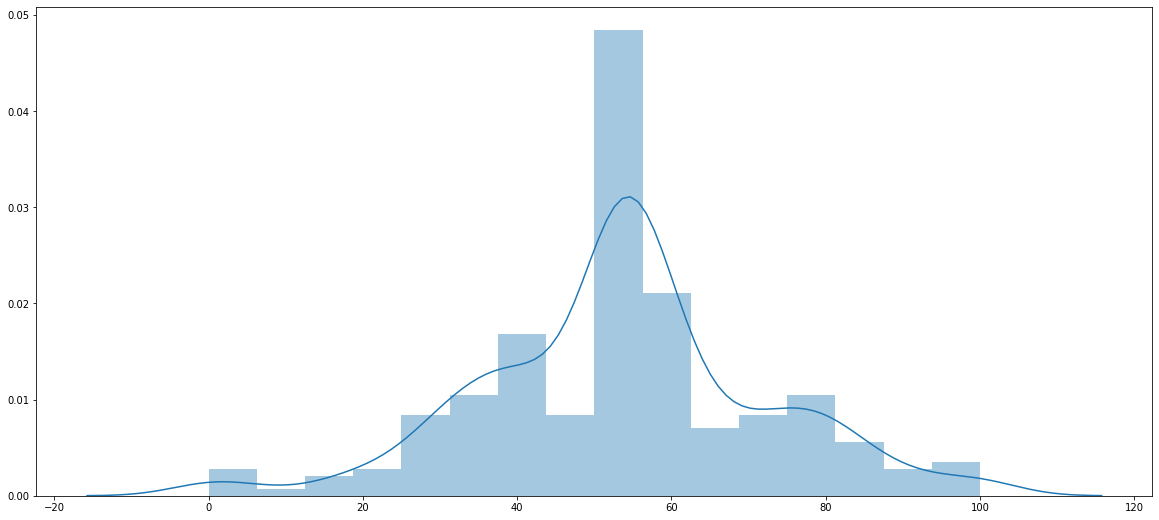

In [33]:
sns.distplot(y2w_var.fillna(y2w_var.mean()))

In [34]:
y23w_var = modw_df[y2w_list + y3w_list].mean(axis=1,skipna=True)

In [35]:
df1 = y23w_var.describe(include='all')

df1.loc['dtype'] = y23w_var.dtypes
df1.loc['size'] = len(y23w_var)
df1.loc['% count'] = y23w_var.isnull().mean()

print (df1)

count            219
mean         52.3912
std          20.8057
min                0
25%          37.3125
50%           52.625
75%          66.2562
max              100
dtype        float64
size             228
% count    0.0394737
dtype: object


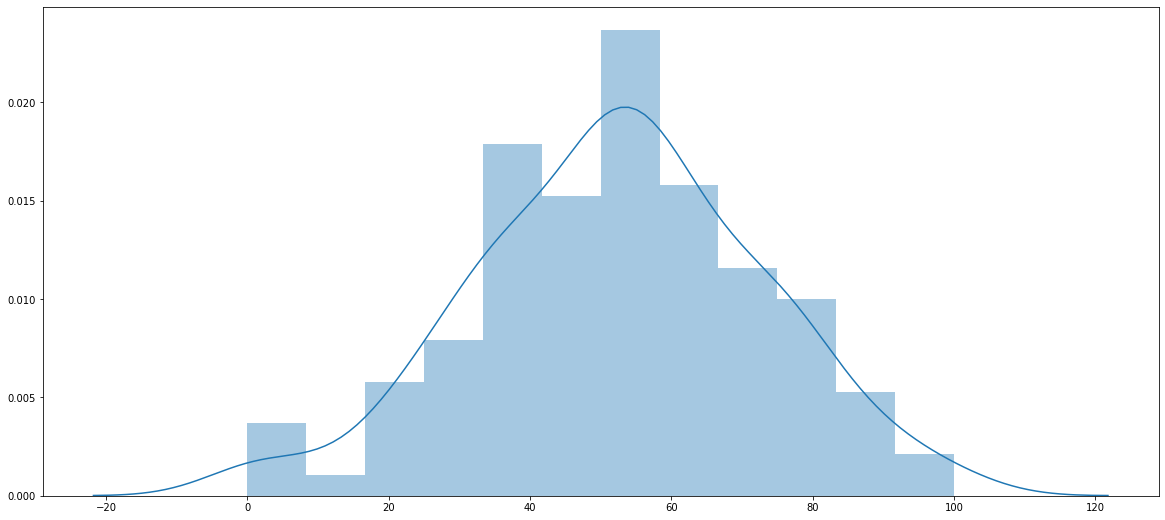

In [36]:
sns.distplot(y23w_var.fillna(y23w_var.mean()))

# y123w w/ Continuous Variables

In [74]:
y_list_list = [[y1w_list + y2w_list + y3w_list], 
              [y1w_list + y2w_list], 
              [y1w_list + y3w_list], 
              [y2w_list + y3w_list],
               y1w_list, 
               y2w_list,
               y3w_list]
y_list_names = ['y123w', 'y12w','y13w','y23w','y1w','y2w','y3w']

i=0

X_drop = [[y1_list + y2_list + y3_list + x1_list + x2_list + x3_list ], 
          [y1_list + y2_list + x1_list + x2_list], 
          [y1_list + y3_list + x1_list + x3_list], 
          [y2_list + y3_list + x2_list + x3_list],
           y1_list + x1_list,  
           y2_list + x2_list,
           y3_list + x3_list]

X_list = cont_dummy_list

y_list = y_list_list[i]
    
    
y_funct = 'mean'
print(y_list_names[i])

clf,MeanAbsoluteError, accuracy, y_na, varimp0, varimp1, varimp2, feature_importances, X_drop  = rf_pipe (
               mod_df = modw_df, 
               y_list = y_list, # list of response variables, if len()>1, these will be summed or meaned
               X_list = X_list,
               y_funct = y_funct, # either None, 'sum' or 'mean'. Must be one of non-None if len(y_list)>1
               X_drop = X_drop[i], # list of additional predictors to drop 
               imp_filename = '../data/output/temp.csv') #% (y_list_names[i],y_funct))

y123w


In [75]:
accuracy

67.07662601055597

In [38]:
varimp_df = pd.DataFrame(feature_importances)
varimp_top10 = varimp_df[0].values[0:10]

varimp_df = varimp_df.merge(map_df, left_on=0,right_on='new')
varimp_df.columns = ['var','imp','var_2','Q']
varimp_df = varimp_df[['var','Q','imp']]
varimp_df[['Q','imp']][0:10]

,Q,imp
0,Please rate the importance of the following reasons driving your organization’s decision to purchase Oracle Java SE Subscription. Please rate each item on a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”. Price/Performance Ratio,0.10
1,"On a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”, please rate the importance of the information channels that increased your awareness of Oracle Java SE Subscription. Oracle websites",0.08
2,"On a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”, please rate the importance of the information channels that increased your awareness of Oracle Java SE Subscription. Social Media outlets (e.g. Twitter, LinkedIn, Facebook, etc.)",0.07
3,"On a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”, please rate the importance of the information channels that increased your awareness of Oracle Java SE Subscription. Oracle Sales professionals",0.06
4,"On a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”, please rate the importance of the information channels that increased your awareness of Oracle Java SE Subscription. Peers’ recommendations",0.06
5,"Eclipse IDE Level of satisfaction (0-10)[ , ]",0.04
6,Please rate the importance of the following reasons driving your organization’s decision to purchase Oracle Java SE Subscription. Please rate each item on a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”. Market trends,0.04
7,"Eclipse IDE Level of use (0-10) [ , ]",0.03
8,"On a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”, please rate the importance of the information channels that increased your awareness of Oracle Java SE Subscription. Blogs",0.03
9,"On a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”, please rate the importance of the information channels that increased your awareness of Oracle Java SE Subscription. User communities",0.03


In [39]:
X = modw_df.drop(y_list, axis=1, errors='ignore')
X = X[X_list]
X = X.drop(y1_list + y2_list + y3_list + x1_list + x2_list + x3_list,
           axis=1, errors='ignore')
X = X.fillna(X.mean())
X_train, X_test = train_test_split(X, random_state=0)

In [40]:
tuple(varimp_top10[0:2])

('OJavaSESubscription_OrgPurch_Imp_PrPerRatio',
 'Information_Channel_Imp_OWebsites')

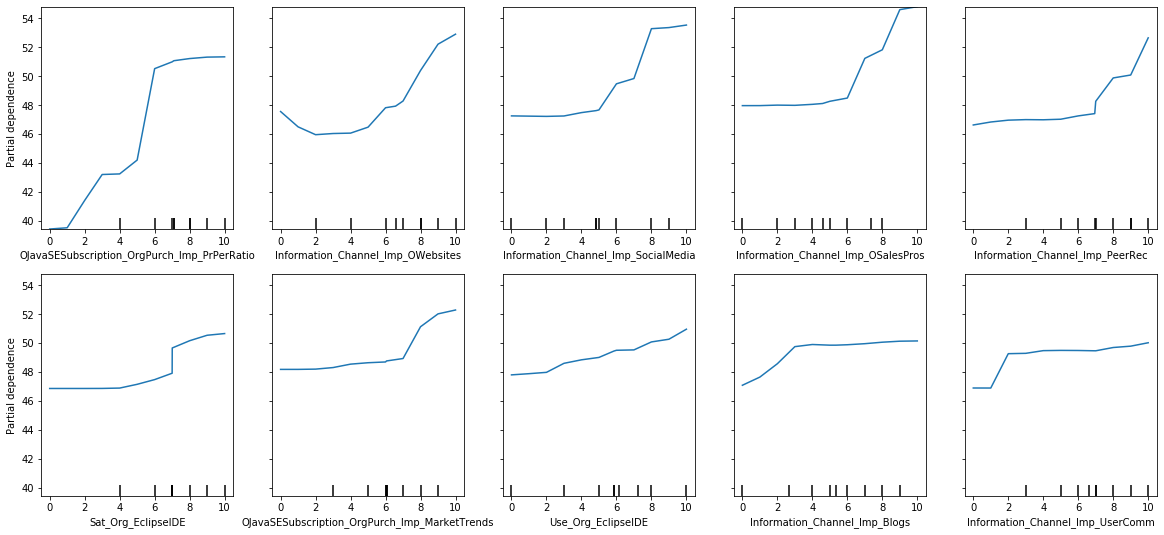

In [41]:
plot_partial_dependence(clf, X_train, varimp_top10, 
                        n_cols=5, grid_resolution=100)

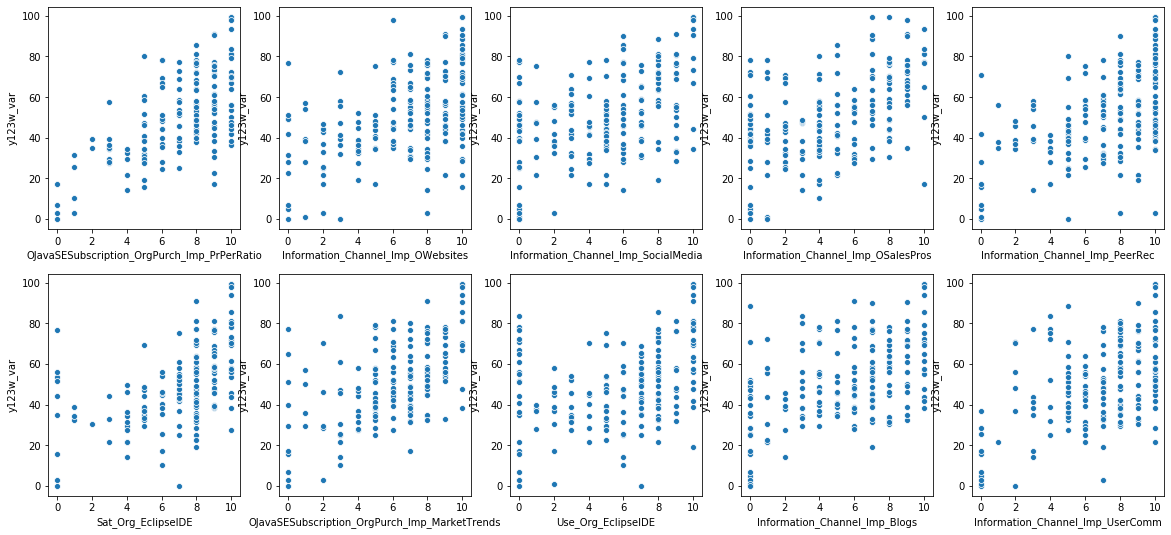

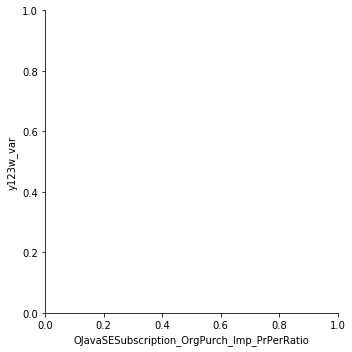

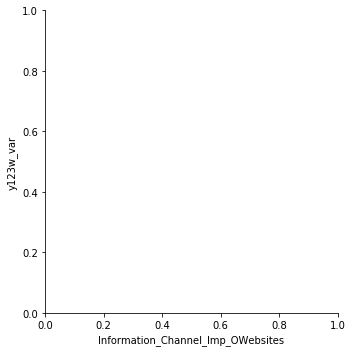

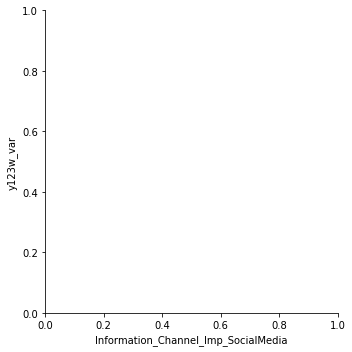

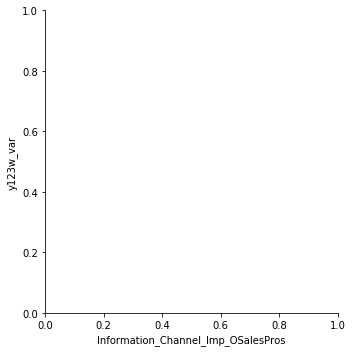

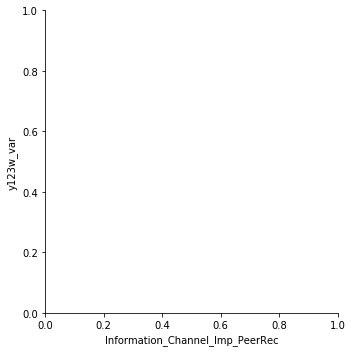

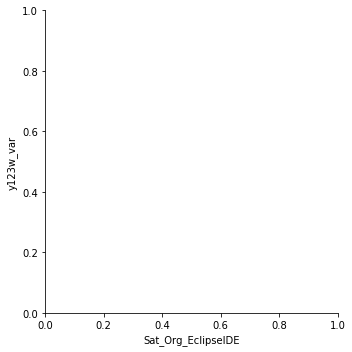

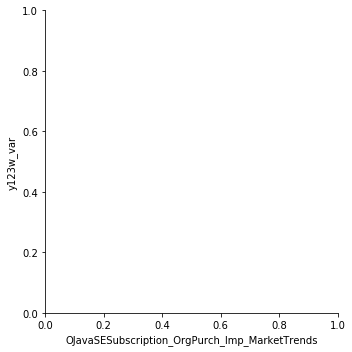

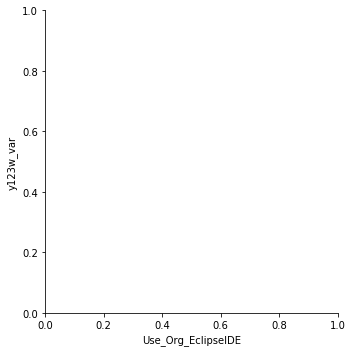

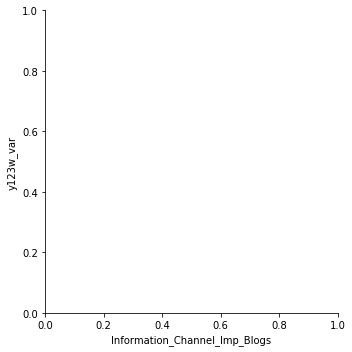

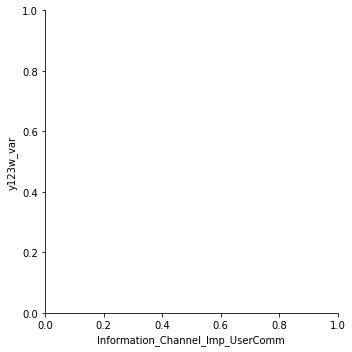

In [42]:
fig, axs = plt.subplots(ncols=5, nrows=2)
i=0
axli = axs.flatten()
for v in varimp_top10:
    sns.relplot(x=v, y="y123w_var", data=modw_df, ax=axli[i])
    i=i+1

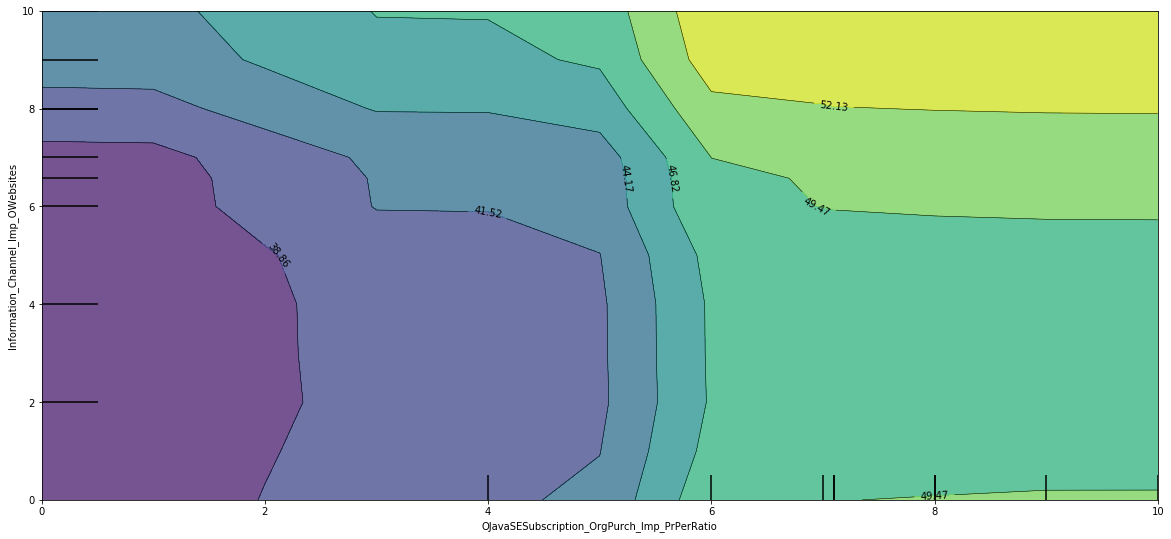

In [43]:
plot_partial_dependence(clf, X_train, [tuple(varimp_top10[0:2])])

In [44]:
# Examine each  driver... look for low use, low importance, low satisfation
print(varimp_top10)

['OJavaSESubscription_OrgPurch_Imp_PrPerRatio'
 'Information_Channel_Imp_OWebsites' 'Information_Channel_Imp_SocialMedia'
 'Information_Channel_Imp_OSalesPros' 'Information_Channel_Imp_PeerRec'
 'Sat_Org_EclipseIDE' 'OJavaSESubscription_OrgPurch_Imp_MarketTrends'
 'Use_Org_EclipseIDE' 'Information_Channel_Imp_Blogs'
 'Information_Channel_Imp_UserComm']


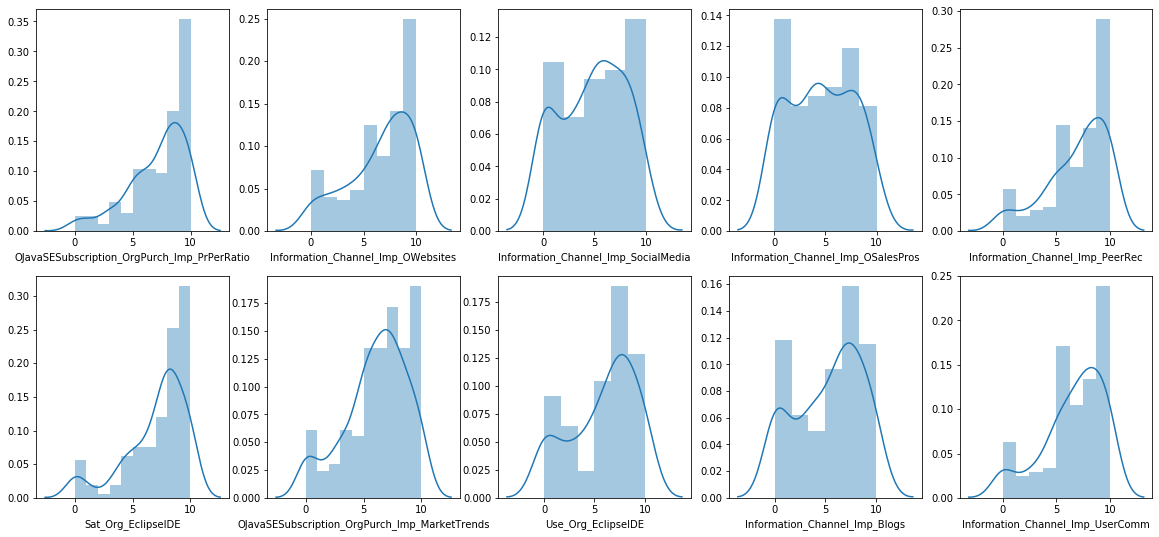

In [45]:
fig, axs = plt.subplots(ncols=5, nrows=2)
i=0
axli = axs.flatten()
for v in varimp_top10:
    sns.distplot(mod_df[v].dropna(), ax=axli[i])
    i=i+1

# y123w w/ Categ Variables

In [47]:
y_list_list = [[y1w_list + y2w_list + y3w_list], 
              [y1w_list + y2w_list], 
              [y1w_list + y3w_list], 
              [y2w_list + y3w_list],
               y1w_list, 
               y2w_list,
               y3w_list]
y_list_names = ['y123w', 'y12w','y13w','y23w','y1w','y2w','y3w']

i=0

X_drop = [[y1_list + y2_list + y3_list + x1_list + x2_list + x3_list ], 
          [y1_list + y2_list + x1_list + x2_list], 
          [y1_list + y3_list + x1_list + x3_list], 
          [y2_list + y3_list + x2_list + x3_list],
           y1_list + x1_list,  
           y2_list + x2_list,
           y3_list + x3_list]

X_list = catg_dummy_list+ dummy0_dummy_list

y_list = y_list_list[i]
    
    
y_funct = 'mean'
print(y_list_names[i])

clf,MeanAbsoluteError, accuracy, y_na, varimp0, varimp1, varimp2, feature_importances, X_drop  = rf_pipe (
               mod_df = modw_df, 
               y_list = y_list, # list of response variables, if len()>1, these will be summed or meaned
               X_list = X_list,
               y_funct = y_funct, # either None, 'sum' or 'mean'. Must be one of non-None if len(y_list)>1
               X_drop = X_drop[i], # list of additional predictors to drop 
               imp_filename = '../data/output/temp.csv') #% (y_list_names[i],y_funct))

y123w


In [48]:
accuracy

51.7184639136537

In [49]:
varimp_df = pd.DataFrame(feature_importances).sort_values(1,ascending=False)
varimp_top10 = varimp_df[0].values[0:10]

In [50]:
varimp_top10

array(['Country_Code_CA', 'Job_Title_3',
       'OracleJavaSESubscription_Ind_Role_1',
       'Platform_Dev_Org_Primary_8', 'JavaSESub_PrePurchasePeriod_1',
       'OJavaSESubscription_Alts_Top3_AppSecurity', 'Company_Industry_20',
       'OJavaSESubscription_Alts_Top3_OpenSourceTools',
       'OJavaSESubscription_Alts_Top3_CostManagement',
       'OJavaSESubscription_Alts_Top3_Flexibility'], dtype=object)

In [51]:
varimp_df = pd.DataFrame(feature_importances).sort_values(1,ascending=False)
varimp_top10 = varimp_df[0].values[0:10]
varimp_df = varimp_df.merge(map_df, left_on=0,right_on='new', how='left')
varimp_df.columns = ['var','imp','var_2','Q']
varimp_df['var3'] = ["_".join(t[:-1]) for t in varimp_df['var'].str.split('_')]
varimp_df['var4'] = [t[-1] for t in varimp_df['var'].str.split('_')]
varimp_df = varimp_df.merge(map_df, left_on='var3',right_on='new', how='left')
varimp_df.org = varimp_df.org + " " + varimp_df.var4
varimp_df['Q'] = varimp_df['Q'].fillna(varimp_df['org'])
varimp_df[['Q','imp']].sort_values('imp',ascending=False)[0:10]

,Q,imp
0,Country Code CA,0.03
2,Which of the following statements most closely describes your role in the selection and use of Oracle Java SE Subscription? (Select one) 1,0.03
3,Which platform does your organization primarily develop for? 8,0.03
4,Approximately how long was the period between the time you first became aware of Java SE Subscription to the time that you purchased it? 1,0.03
5,"From the list below, please check the top 3 reasons for which you would consider alternatives to Oracle Java SE Subscription. [Greater application security]",0.03
6,Which one of the below best describes your company’s industry grouping? 20,0.03
1,What is your job title? 3,0.03
24,Which one of the below best describes your company’s industry grouping? 9,0.02
20,Which platform does your organization primarily develop for? 3,0.02
21,Which one of the below best describes your company’s industry grouping? 2,0.02


In [52]:
X = modw_df.drop(y_list, axis=1, errors='ignore')
X = X[X_list]
X = X.drop(y1_list + y2_list + y3_list + x1_list + x2_list + x3_list,
           axis=1, errors='ignore')
X = X.fillna(X.mean())
X_train, X_test = train_test_split(X, random_state=0)

In [53]:
varimp_top10

array(['Country_Code_CA', 'Job_Title_3',
       'OracleJavaSESubscription_Ind_Role_1',
       'Platform_Dev_Org_Primary_8', 'JavaSESub_PrePurchasePeriod_1',
       'OJavaSESubscription_Alts_Top3_AppSecurity', 'Company_Industry_20',
       'OJavaSESubscription_Alts_Top3_OpenSourceTools',
       'OJavaSESubscription_Alts_Top3_CostManagement',
       'OJavaSESubscription_Alts_Top3_Flexibility'], dtype=object)

In [54]:
tuple(varimp_top10[0:2])

('Country_Code_CA', 'Job_Title_3')

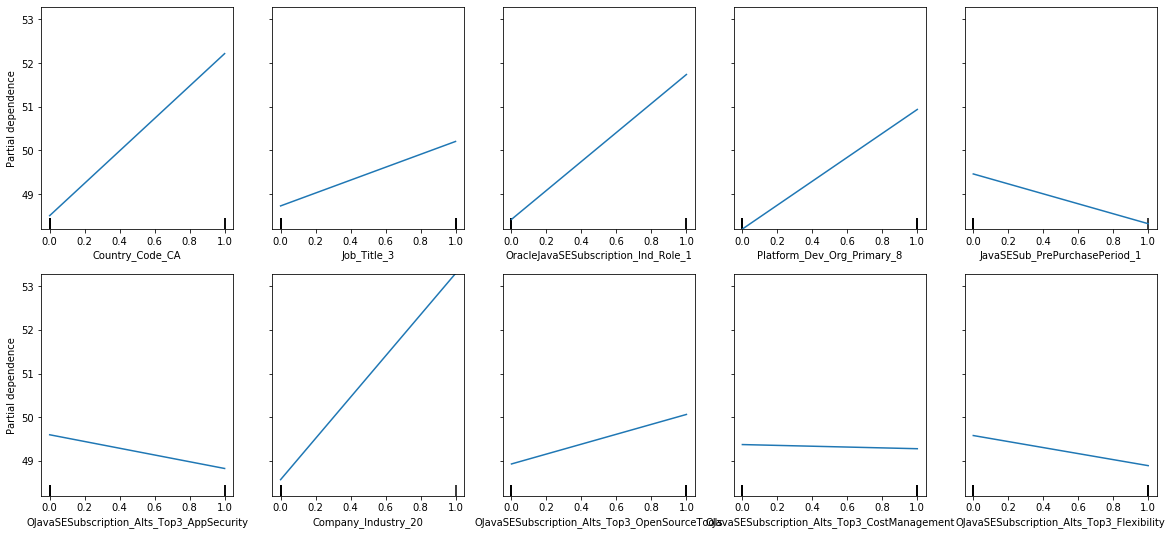

In [55]:
plot_partial_dependence(clf, X_train, varimp_top10, 
                        n_cols=5, grid_resolution=100)

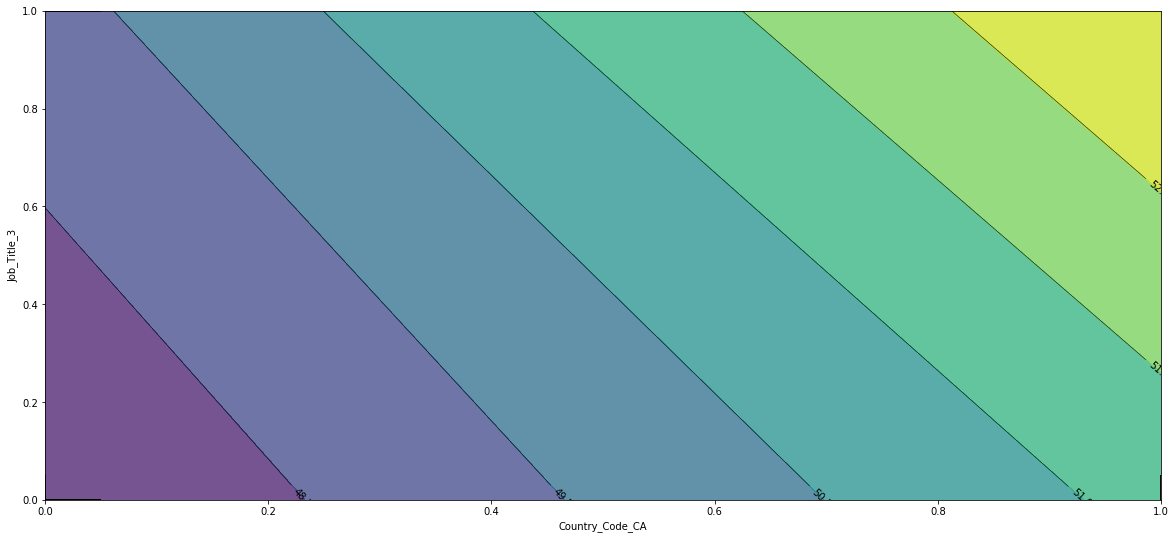

In [56]:
plot_partial_dependence(clf, X_train, [tuple(varimp_top10[0:2])])

In [57]:
# Examine each  driver... look for low use, low importance, low satisfation
print(varimp_top10)

['Country_Code_CA' 'Job_Title_3' 'OracleJavaSESubscription_Ind_Role_1'
 'Platform_Dev_Org_Primary_8' 'JavaSESub_PrePurchasePeriod_1'
 'OJavaSESubscription_Alts_Top3_AppSecurity' 'Company_Industry_20'
 'OJavaSESubscription_Alts_Top3_OpenSourceTools'
 'OJavaSESubscription_Alts_Top3_CostManagement'
 'OJavaSESubscription_Alts_Top3_Flexibility']


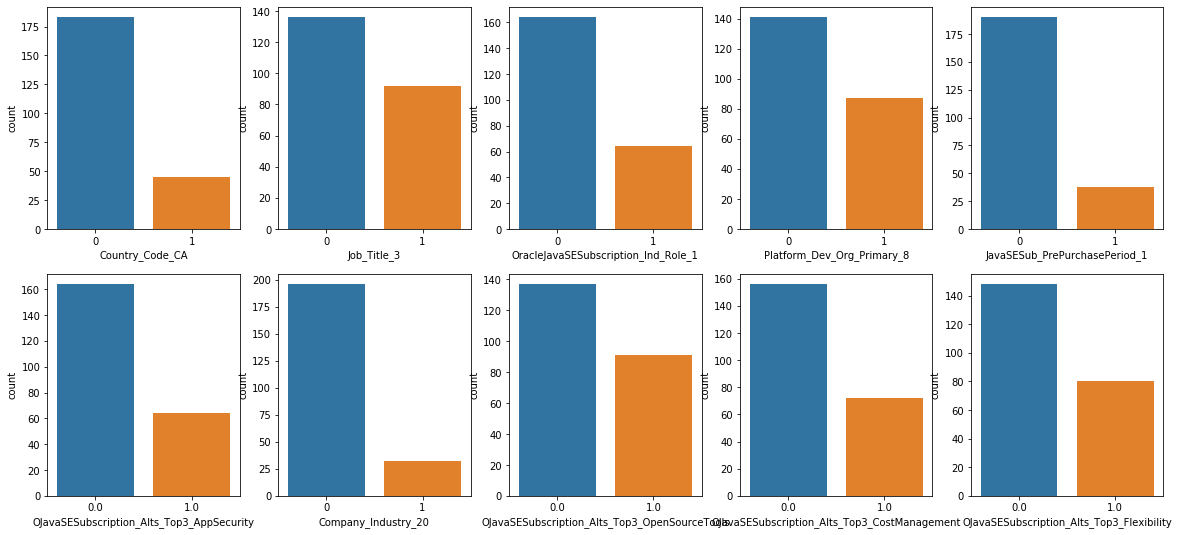

In [58]:
fig, axs = plt.subplots(ncols=5, nrows=2)
i=0
axli = axs.flatten()
for v in varimp_top10:
    sns.countplot(mod_df[v].dropna(), ax=axli[i])
    i=i+1

In [59]:
mod_df['Country_Code_CA'].groupby(mod_df['Country_Code_CA']).count()

Country_Code_CA
0    183
1     45
Name: Country_Code_CA, dtype: int64

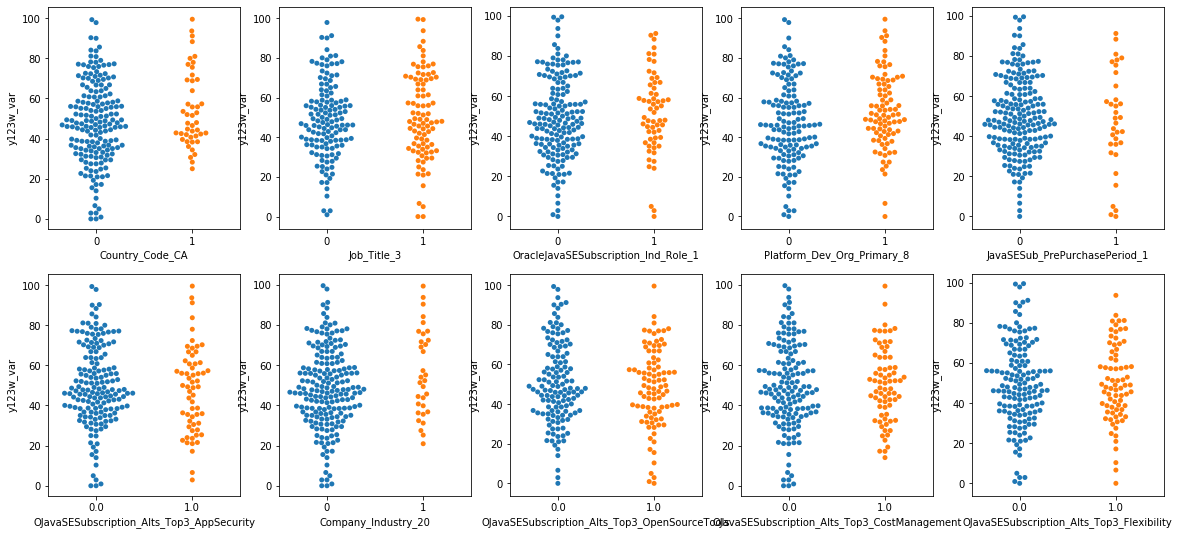

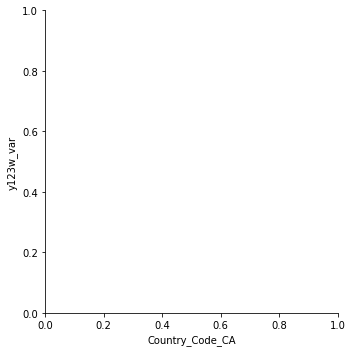

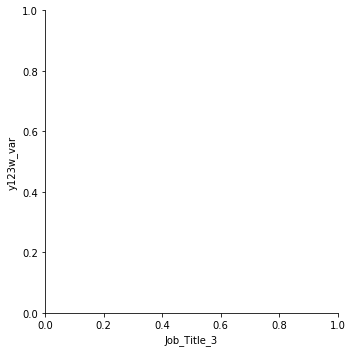

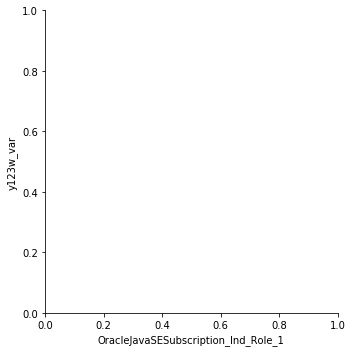

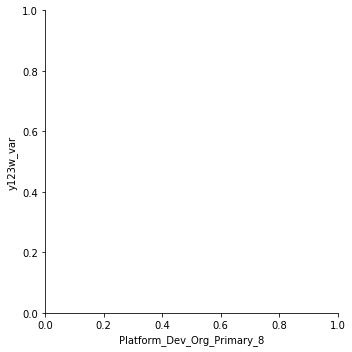

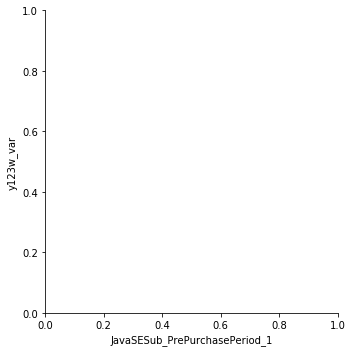

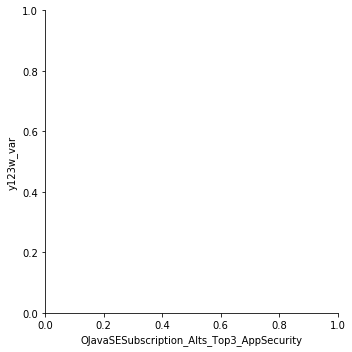

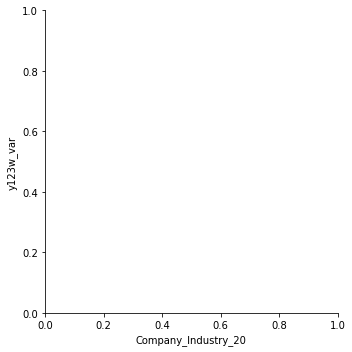

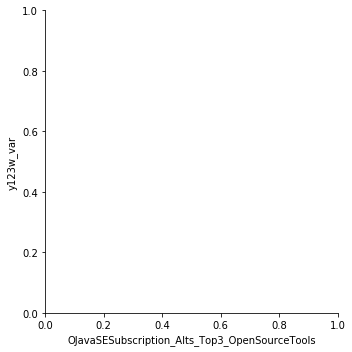

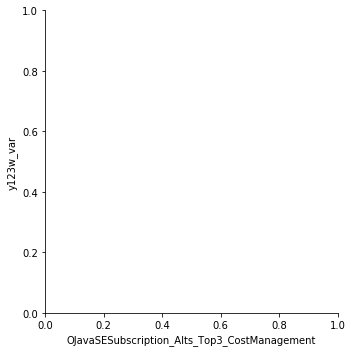

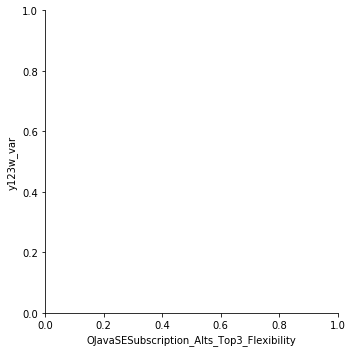

In [214]:
fig, axs = plt.subplots(ncols=5, nrows=2)
i=0
axli = axs.flatten()
for v in varimp_top10:
    sns.catplot(x=v, y="y123w_var", kind="swarm", 
                data=modw_df, ax=axli[i])
    i=i+1


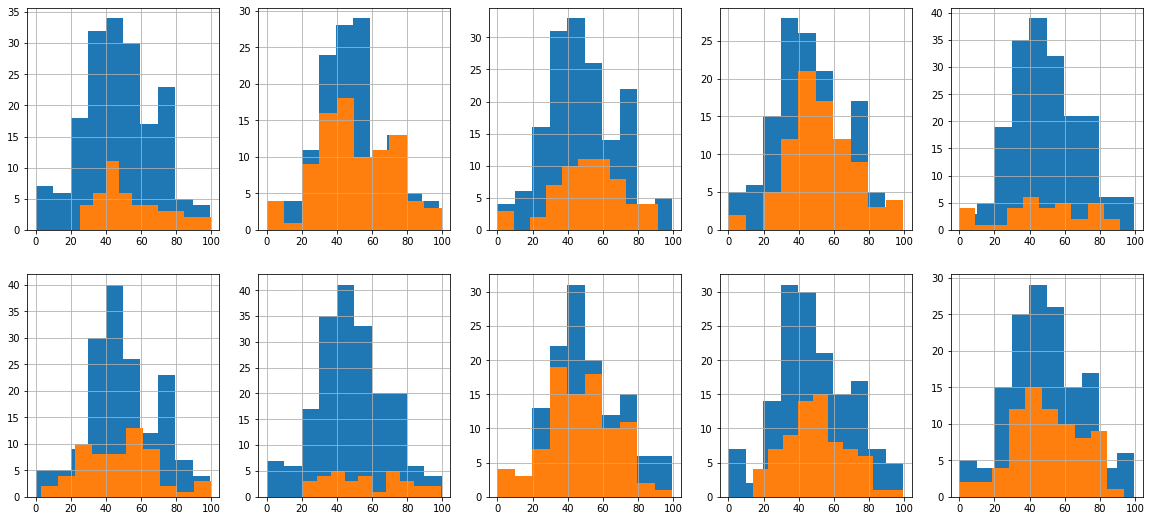

In [73]:
fig, axs = plt.subplots(ncols=5, nrows=2)
i=0
axli = axs.flatten()
for v in varimp_top10:
    modw_df.groupby(v)['y123w_var'].hist(ax=axli[i])
    i=i+1
